In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [63]:
with open("./data/sarcastic-headline-dataset/Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore = json.load(f)

training_sentences = []
training_labels = []

for item in datastore:
    training_sentences.append(item['headline'])
    training_labels.append(item['is_sarcastic'])

In [64]:
print(training_sentences[:2])
print(training_labels[:2])

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse"]
[0, 0]


In [65]:
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [66]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [67]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [69]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

model.add(GlobalAveragePooling1D())

model.add(Dense(24, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [73]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[early_stop])

Epoch 1/30
835/835 - 11s - loss: 0.6364 - accuracy: 0.6282 - val_loss: 0.4724 - val_accuracy: 0.8028
Epoch 2/30
835/835 - 11s - loss: 0.3739 - accuracy: 0.8494 - val_loss: 0.3154 - val_accuracy: 0.8730
Epoch 3/30
835/835 - 11s - loss: 0.2906 - accuracy: 0.8845 - val_loss: 0.2594 - val_accuracy: 0.9025
Epoch 4/30
835/835 - 11s - loss: 0.2484 - accuracy: 0.9022 - val_loss: 0.2363 - val_accuracy: 0.9089
Epoch 5/30
835/835 - 11s - loss: 0.2206 - accuracy: 0.9146 - val_loss: 0.1980 - val_accuracy: 0.9276
Epoch 6/30
835/835 - 11s - loss: 0.1978 - accuracy: 0.9244 - val_loss: 0.1819 - val_accuracy: 0.9340
Epoch 7/30
835/835 - 11s - loss: 0.1818 - accuracy: 0.9305 - val_loss: 0.1636 - val_accuracy: 0.9426
Epoch 8/30
835/835 - 11s - loss: 0.1656 - accuracy: 0.9377 - val_loss: 0.1672 - val_accuracy: 0.9362
Epoch 9/30
835/835 - 11s - loss: 0.1541 - accuracy: 0.9423 - val_loss: 0.1426 - val_accuracy: 0.9493
Epoch 10/30
835/835 - 11s - loss: 0.1416 - accuracy: 0.9471 - val_loss: 0.1288 - val_accura

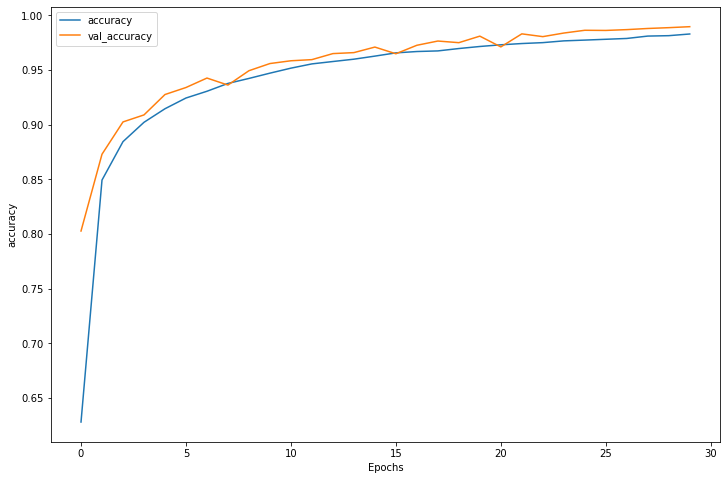

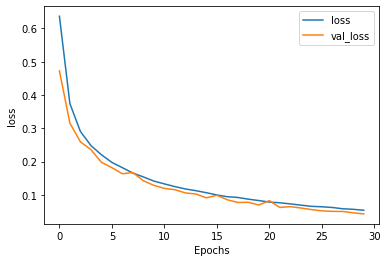

In [74]:
plt.figure(figsize=(12, 8))

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [75]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9043393e-01]
 [3.5770750e-05]]


In [46]:
test_pred = model.predict(padded)

In [47]:
np.round(test_pred)

array([[0.],
       [0.]], dtype=float32)

In [77]:
model.save('sarcasm_model.h5')

In [78]:
sentence = ["Child Beauty Experts Recommend Revitalizing Skin With Elmer’s Glue Peel"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred_temp = model.predict(padded)
print(np.round(pred_temp[0][0]))

1.0


In [79]:
import pickle

In [80]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [84]:
with open('pad_seq.pickle', 'wb') as handle:
    pickle.dump(pad_sequences, handle, protocol=pickle.HIGHEST_PROTOCOL)